<h1>HW4</h1>

# Question 1
### (Binomial) Read the following example and complete the exercises 

#### Tossing a Biased Coin
You are asked if you want to bet on a coin. 
```
You have 10 coin tosses. 
```
```
If you get exactly 5 heads, you win 30 dollars. 
```
```
Otherwise you loss 10 dollars. 
```
```
Based on our previous observation, the coin is biased. The chance of getting head is approximately 0.4. 
```
Now you need to think about if you want to play it or not. 

### 1.1 

You recall that binomial distribution is commonly used to determine the probability of observing a specified number of successful outcomes in a specified number of trials. The equation for pdf of binomial distribution is: 

\begin{equation*}
P(X = k) = \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}
\end{equation*}

Where 
```
k: Number of successful trials
n: Total number of trials
p: Probability of success in one trial
```

Create a functon to calculate the pdf of a binomial distribution

```
Function name: binomial_p
```
```
Input: n, k, p
```
```
Output: pdf of a binomial distribution
```
```
Example: binomial_p(10, 2, 0.4) = 0.12093235199999998
```

In [4]:
function binomial_p(n, k, p)
    P = (factorial(n)/((factorial(k)) * factorial(n-k))) * p^k * (1-p)^(n-k)
end

binomial_p (generic function with 1 method)

### 1.2 

Now you want to use the function to calculate the probabilities of 
1. Winning the bet
2. Losing the bet

The chance of winning the bet:

In [9]:
n = 10
k = 5
p = 0.4
winP = binomial_p(n, k, p) 
win = winP * 100
print(win, "%")

20.06581248%

The chance of losing the bet:

In [10]:
loseP = (1 - winP)
lose = loseP * 100
print(lose, "%")

79.93418752%

### 1.3

Would you expect yourself earning or losing money in the game?

\*Hint: What is the expected outcome

In [11]:
E = (winP * 10) + (loseP * -10)

-5.986837504

You would expect to be losing money in the game since the expected amount of money is negative

### 1.4

1. What if you need to get exactly 4 heads to win the game? What are the probabilities of winning and losing? 

2. Would you expect yourself earning or losing money in this case?

In [13]:
k = 4
winP = binomial_p(n, k, p)
win = winP * 100
print(win, "%")

25.0822656%

In [14]:
lose = (1 - winP) * 100
print(lose, "%")

74.9177344%

In [15]:
E = (winP * 10) + (loseP * -10)

-5.485192192

Once again, it is more likely that you would be losing money in the game since the expected amount of money is negative.

# Question 2
### (Chi-Square) Complete the following exercises 


#### Run the following three cells to define x, y_true, noise, and y_oberved

1. x = 0:1:10
2. y_true = 3x - 2
3. noise = N(0, $\sigma$ = 3)
4. y_observed = y_true + noise


In [1]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random", "Statistics"])

    Updating registry at `C:\Users\slee4\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\slee4\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\slee4\.julia\environments\v1.8\Manifest.toml`


In [2]:
import Distributions as di
using Plots
import Polynomials: coeffs, fit
import Random
using Statistics

In [3]:
x = 0:1:10
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;

### 2.1

1. Fit the data with a first order polynomial
2. Store the coefficients of the fitted polynomial in fit_coeff

In [4]:
line_fit = fit(x, y_true, 1)
fit_coeff = coeffs(line_fit)

2-element Vector{Float64}:
 -1.9999999999999976
  3.0

### 2.2

Given $\chi^2$ defined as:
$$\chi^{2}=\sum_{i}^{N}{\frac{(y_{i}-f(x_{i},\theta))^2}{\sigma_{i}^2}}$$

Create a function to calculate Chi-square value for the $1^{st}$ order polynomial fit

```
Function name: chisqr
```
```
Input: b, m, x, y_observed, sigma
```
```
m and b are the coefficients in the first order polynomial in which m * x + b = y_fit
```
```
Output: Chi-square value of the polynomial model
```

In [5]:
function chisqr(b, m, x, y_observed, sigma)
    return sum((y_observed .- m .* x .- b).^2/sigma^2)
end

chisqr (generic function with 1 method)

### 2.3

\* Don't define random seed anywhere in the notebook
1. Create a empty list chi2_list
2. Use a for/while loop to run through the data simulation and model fitting (as done in the previous steps) 10000 times
3. In each iteration, calculate the Chi-square value for the fitted model and add it to the chi2_list


In [6]:
chi2_list = []
for i in 1:10000
    y_observed = 3 .* x .- 2 .+ Random.rand(di.Normal(0,sigma),length(x))
    line_fit = fit(x, y_true, 1)
    fit_coeff = coeffs(line_fit)
    
    push!(chi2_list, chisqr(fit_coeff[1], fit_coeff[2], x, y_observed, sigma))
end

### 2.4

1. Calculate the mean of chi2_list
2. Explain if the mean value (degree of freedom) make sense or not


In [7]:
mean(chi2_list)

10.958545222087432

The degree of freedom should be the the number of data points and the number of coefficients.

### 2.5

1. Define a Chi-square distribution using the Degree of freedom from 2.4
2. Generate x_dist = 0:0.1:30
3. Calculate pdf of the Chi-square distribution using x_dist
4. Plot the chi2_list in a histogram with bin = 50 
5. Plot the pdf on top of the chi2_list histogram 

In [8]:
chi2 = di.Chisq(11)
x_dist = 0:0.1:30
pdf_plot = di.pdf.(chi2, x_dist)

301-element Vector{Float64}:
 0.0
 1.269882485111256e-8
 2.733277898354055e-7
 1.6120545408707666e-6
 5.5961496783755936e-6
 1.4530135233720975e-5
 3.139572666931961e-5
 5.9760795334220294e-5
 0.00010367293794751044
 0.00016754714541168737
 0.00025605367673983405
 0.0003740101388925016
 0.0005262803748909639
 ⋮
 0.0008393890244123672
 0.0008109596765331353
 0.0007834512829113553
 0.0007568357757368473
 0.0007310858680248973
 0.0007061750350865824
 0.0006820774962969092
 0.0006587681971630195
 0.000636222791694146
 0.0006144176250746653
 0.000593329716641105
 0.0005729367431635622

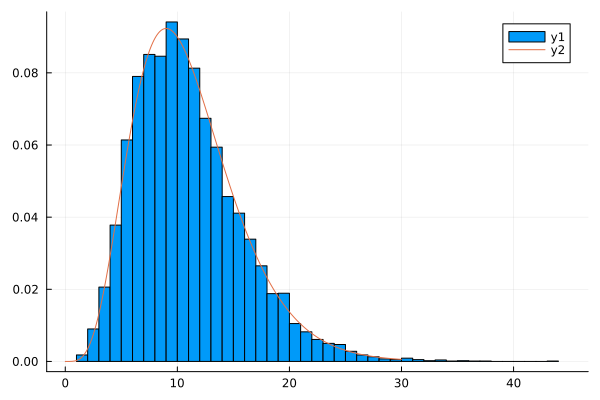

In [9]:
histogram(chi2_list, bin = 50, normalize = true)
plot!(x_dist, pdf_plot)

### 2.6

Given the likelihood is:
$$P(\{y_{i}(x_{i})\}\mid \theta)\propto \exp\big(-\frac{\chi^2}{2}\big)$$

1. Run the following cell to create a function to calculate the likelihood (make sure you named the variables as asked in the previous questions)
2. Define m_range = 1:0.01:5
3. Define b_range = -7:0.01:3
4. Make a contour plot to visualize the distribution of the likelihood


In [10]:
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);

m_range = 1:0.01:5
b_range = -7:0.01:3

-7.0:0.01:3.0

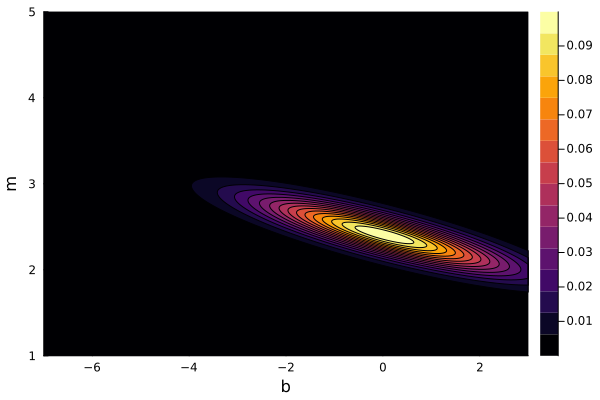

In [11]:
contourf(b_range, m_range, p_chi2poly, xlabel = "b", ylabel = "m")

### 2.7

1. Redefine x = 0:0.5:5 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6
2. Redefine x = 0:2:20 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6

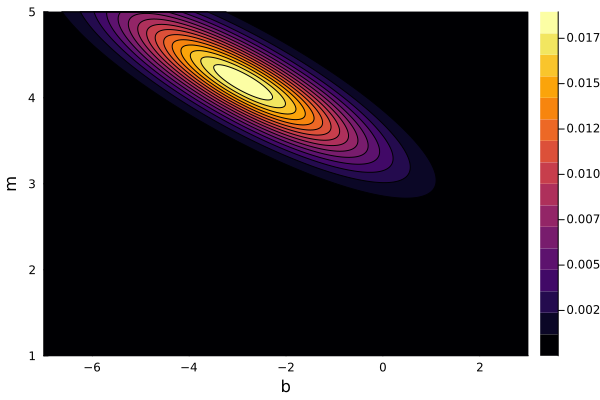

In [12]:
x = 0:0.5:5
y_observed = 3 .* x .- 2 .+ rand(di.Normal(0,sigma),length(x))

hi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);

contourf(b_range, m_range, p_chi2poly, xlabel = "b", ylabel = "m")

Since the range of x values was truncated compared to that of the data in 2.6, the spread of the plot became greater. This is because decreasing the x value range causes it to become more difficult to measure the slope and y-intercept. This shows that there is a relationship between the range of x values and the measured slope and y-intercept.

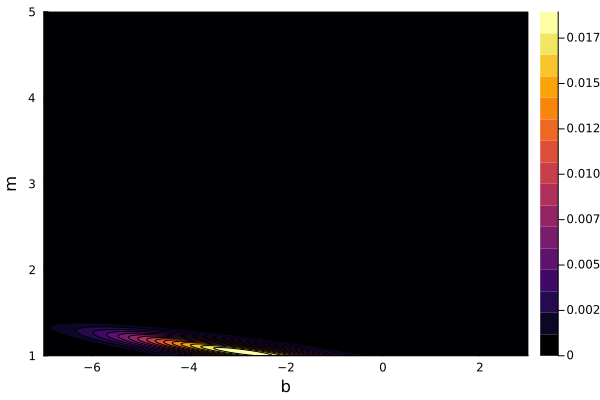

In [13]:
x = 0:2:20
contourf(b_range, m_range, p_chi2poly, xlabel = "b", ylabel = "m")

Here, the x range of values has been increased and the plotted data has a much smaller spread in the m and b axes. This is because increasing the range of x values causes it to be easier to measure the slope and y-intercept.

### 2.8

Change x back to x = 0:1:10

1. Redefine sigma = 5 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6
2. Redefine sigma = 1 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6

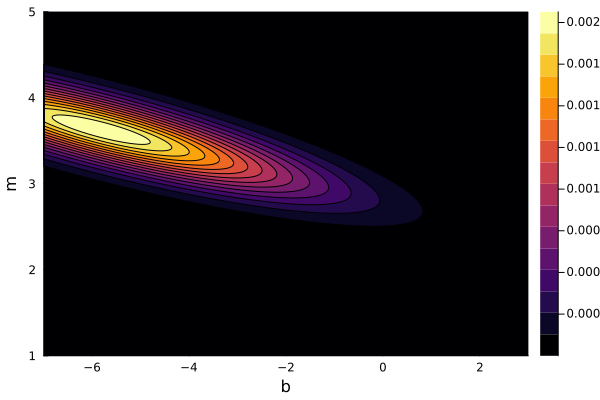

In [14]:
x = 0:1:10
sigma = 5
y_observed = 3 .* x .- 2 .+ rand(di.Normal(0,sigma),length(x))

hi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);

contourf(b_range, m_range, p_chi2poly, xlabel = "b", ylabel = "m")

The plotted data has shifted to the left and has a much larger spread on both the b and m axes. This is because increasing sigma from 3 to 5 causes the outputted data to become much noisier.

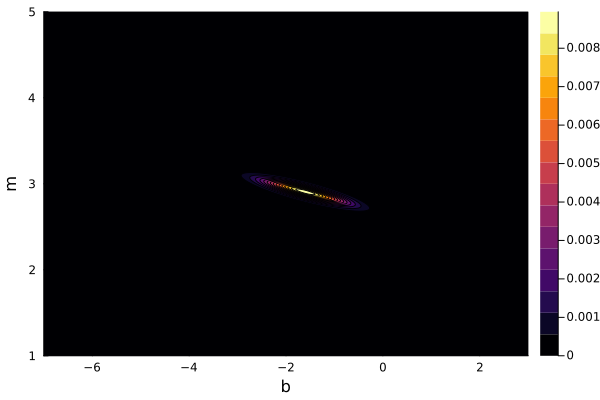

In [15]:
sigma = 1
y_observed = 3 .* x .- 2 .+ rand(di.Normal(0,sigma),length(x))

hi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);

contourf(b_range, m_range, p_chi2poly, xlabel = "b", ylabel = "m")

The plotted data has a smaller spread in both the b and m axes. It also is more closely centered in the b-m space. This is because sigma was reduced from 3 to 1, resulting in data that has much less noise.